In [1]:
from funciones import limpieza,drop_colum
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib.pyplot import figure
import numpy as np
sns.set_style('whitegrid')
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('data/coches-de-segunda-mano-sample.csv')

In [3]:
drop_colum(df)

In [20]:
df.head()

,Marca,Modelo,Precio,Tipo_Combustible,Año,kms,CV,N_Puertas,Tipo_Cambio,color,N_Fotos,Provincia
1,1,172,6200,4,2017.0,50071,82.0,2,2,3,6,42
2,1,814,7851,3,2016.0,103000,100.0,2,2,3,10,7
3,1,221,19426,3,2014.0,120000,140.0,2,2,3,9,33
4,1,813,22850,3,2017.0,107000,130.0,3,2,3,4,39
5,1,40,11490,4,2016.0,78665,130.0,2,2,3,32,29


In [5]:
p_marcas =df.groupby('make',as_index=False)[['price']].mean()
p_marcas= p_marcas.sort_values(by='price',ascending=False)

<AxesSubplot:xlabel='price', ylabel='make'>

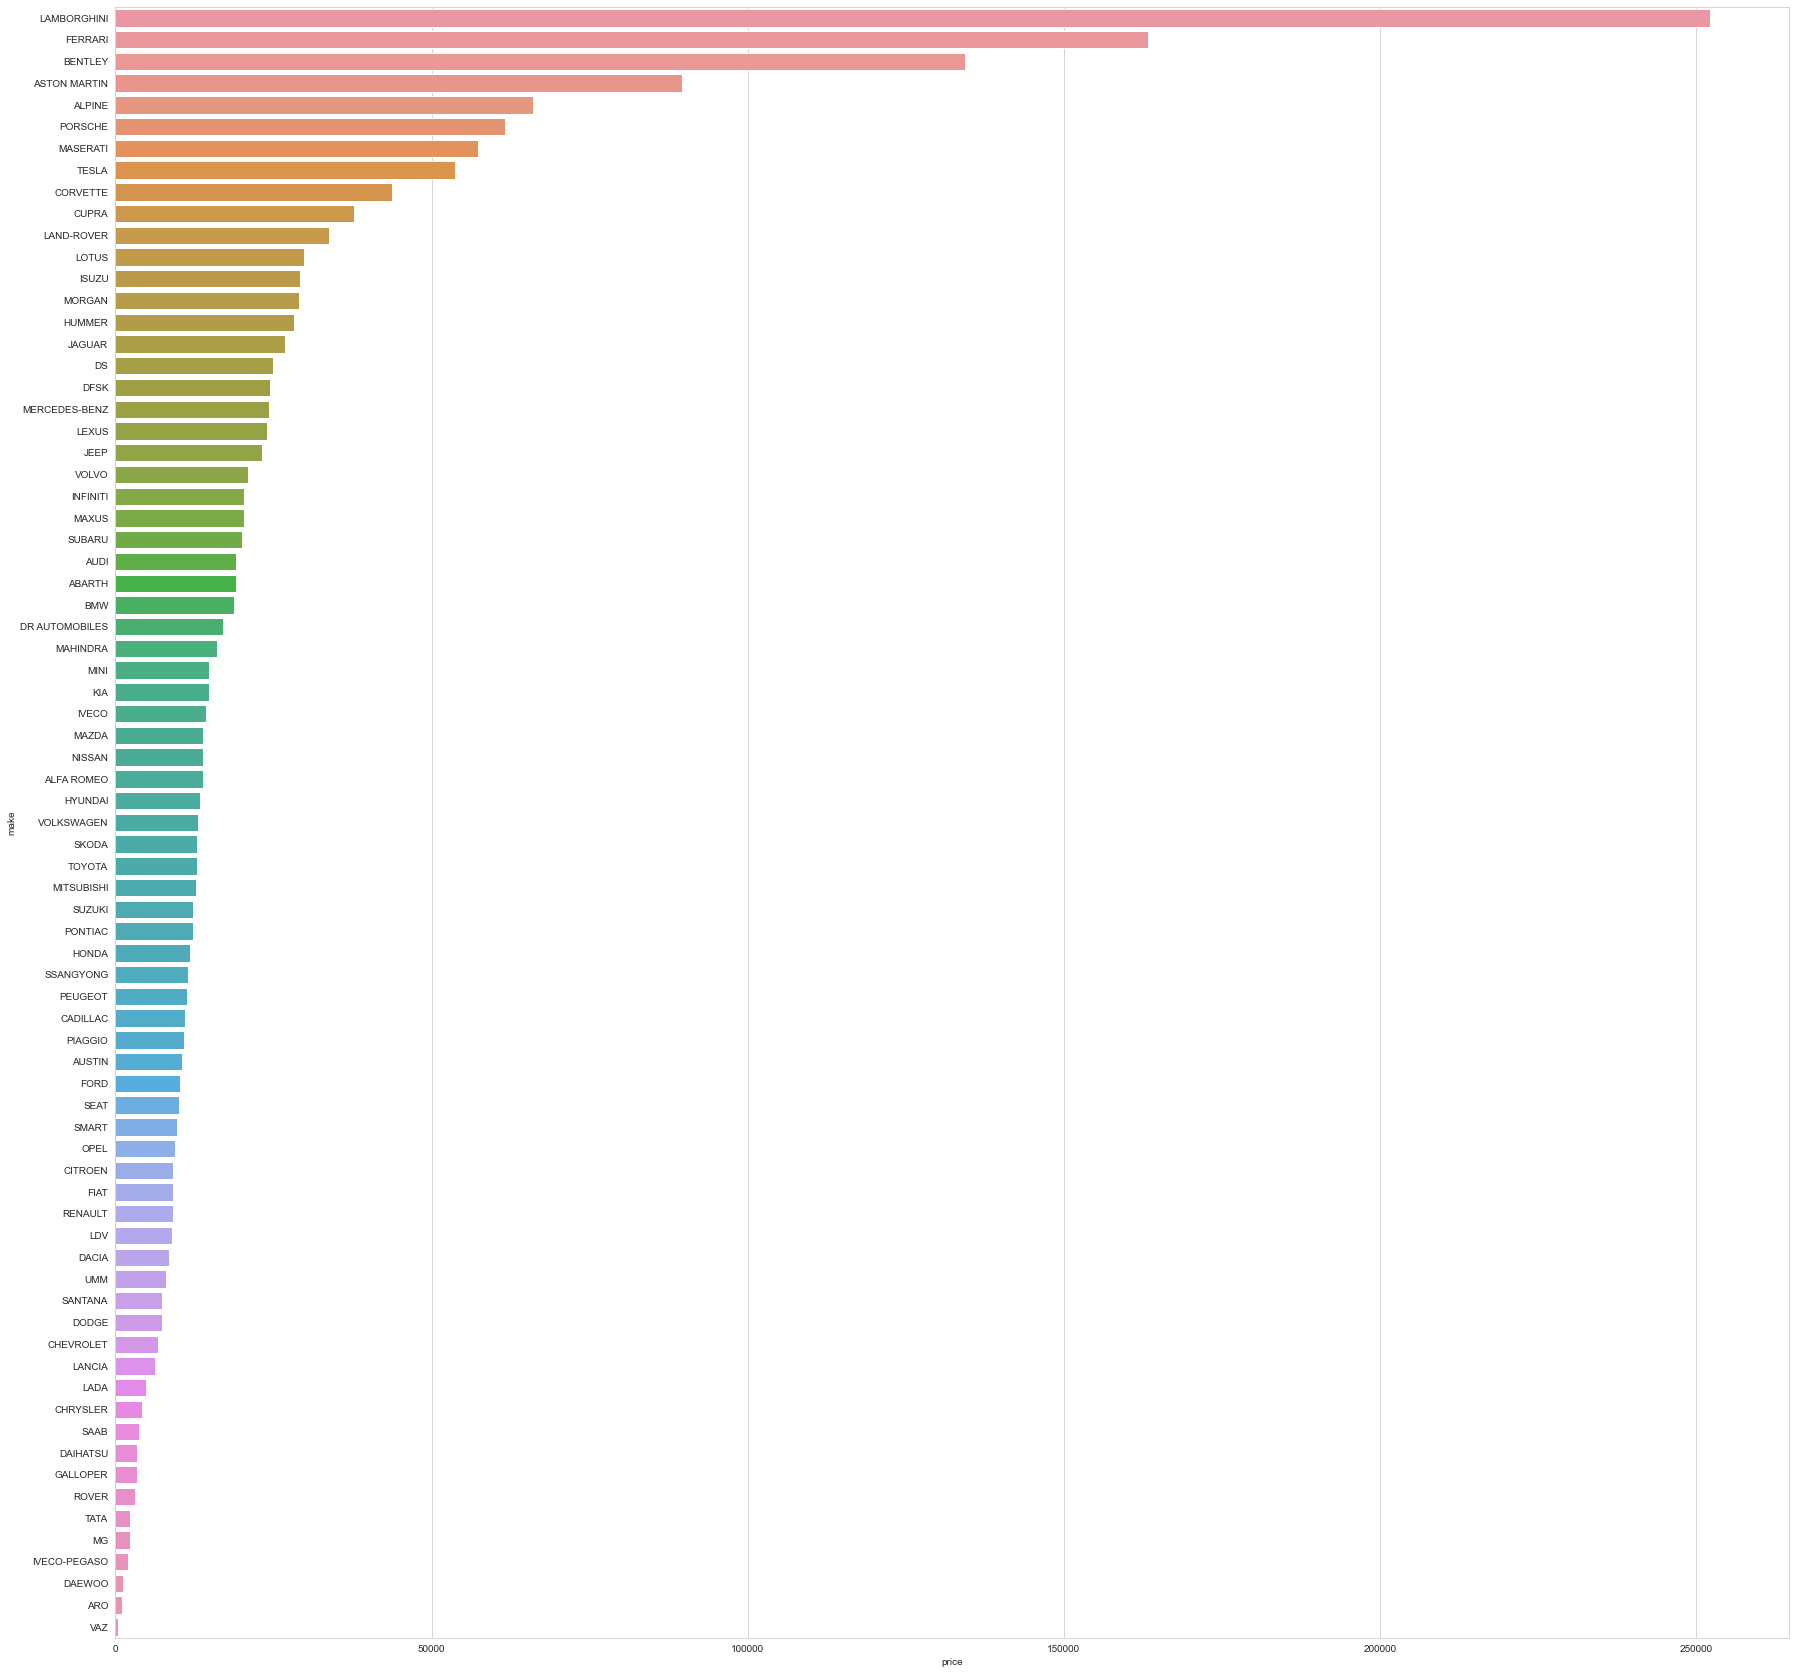

In [6]:
plt.figure(figsize=(30,30))
sns.barplot(x='price',y='make',data=p_marcas)


In [7]:
tipo_motor = df.groupby('fuel',as_index=False)[['price']].mean()
tipo_motor = tipo_motor.sort_values(by='price',ascending=False)

<AxesSubplot:xlabel='price', ylabel='fuel'>

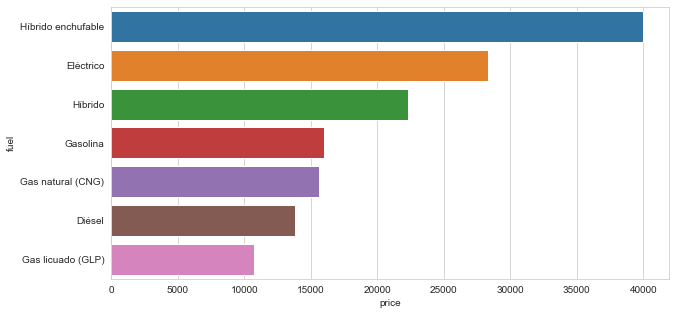

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='price',y='fuel',data=tipo_motor)

In [9]:
provincia = df.groupby('province',as_index=False)[['price']].mean()
provincia = provincia.sort_values(by='price',ascending=False)
provincia.head()

,province,price
8,Burgos,18221.199179
7,Barcelona,17237.967213
17,Girona,16899.483077
50,Álava,16727.797066
29,Madrid,16656.879954


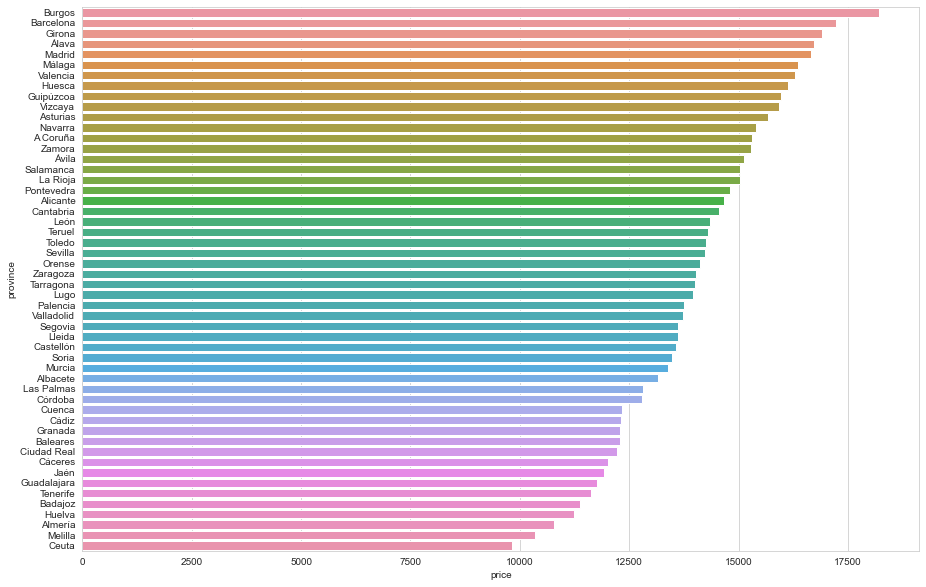

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(x='price',y='province',data=provincia);

In [11]:
n_fotos = df.groupby('photos',as_index=False)[['price']].mean()
n_fotos = n_fotos.sort_values(by='price',ascending=False)
n_fotos.head()

,photos,price
49,49,27676.783019
54,54,27436.958011
48,48,27122.626016
47,47,24440.489796
42,42,24180.795455


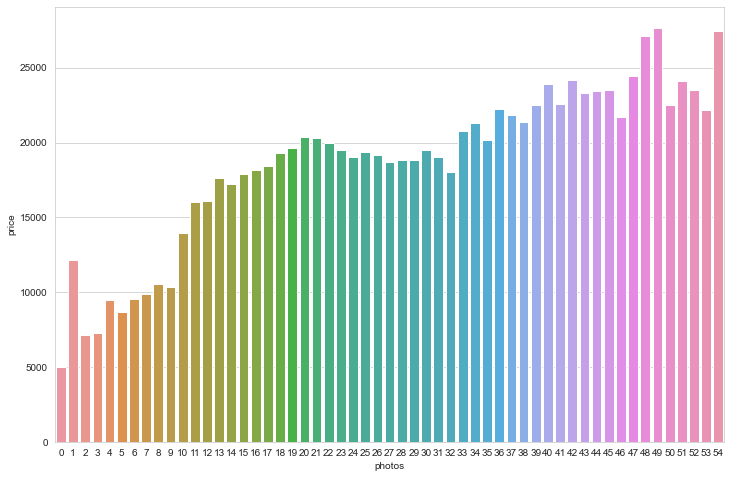

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x='photos',y='price',data=n_fotos);

In [13]:
n_puertas = df.groupby('doors',as_index=False)[['price']].mean()
n_puertas = n_puertas.sort_values(by='price',ascending=False)
n_puertas

,doors,price
0,2,25794.595968
2,4,15663.600371
3,5,15365.221541
1,3,8000.129032


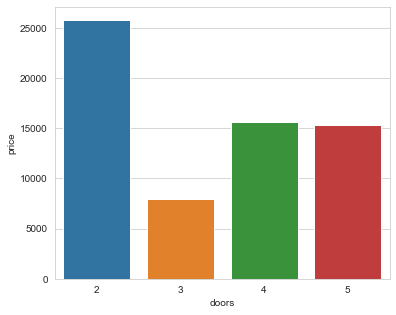

In [14]:
plt.figure(figsize=(6,5))
sns.barplot(x='doors',y='price',data=n_puertas);

In [15]:
limpieza(df)

In [16]:
df.head()

,make,model,price,fuel,year,kms,power,doors,shift,color,photos,province
1,1,172,6200,4,2017.0,50071,82.0,2,2,3,6,42
2,1,814,7851,3,2016.0,103000,100.0,2,2,3,10,7
3,1,221,19426,3,2014.0,120000,140.0,2,2,3,9,33
4,1,813,22850,3,2017.0,107000,130.0,3,2,3,4,39
5,1,40,11490,4,2016.0,78665,130.0,2,2,3,32,29


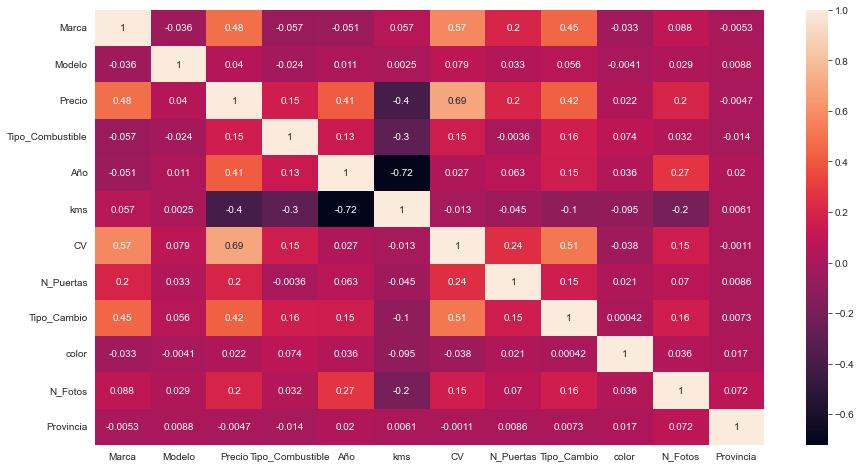

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True);

C:\Users\ejgar\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


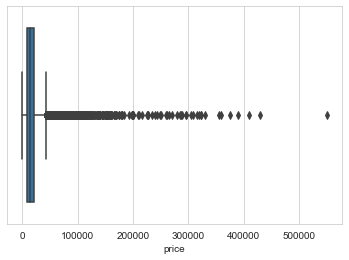

In [18]:
sns.boxplot(df['price']);


C:\Users\ejgar\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


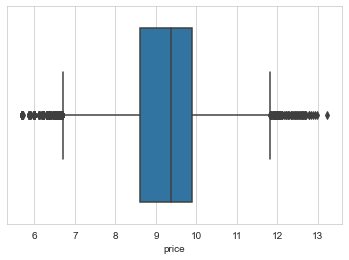

In [162]:
sns.boxplot(np.log(df['price']));

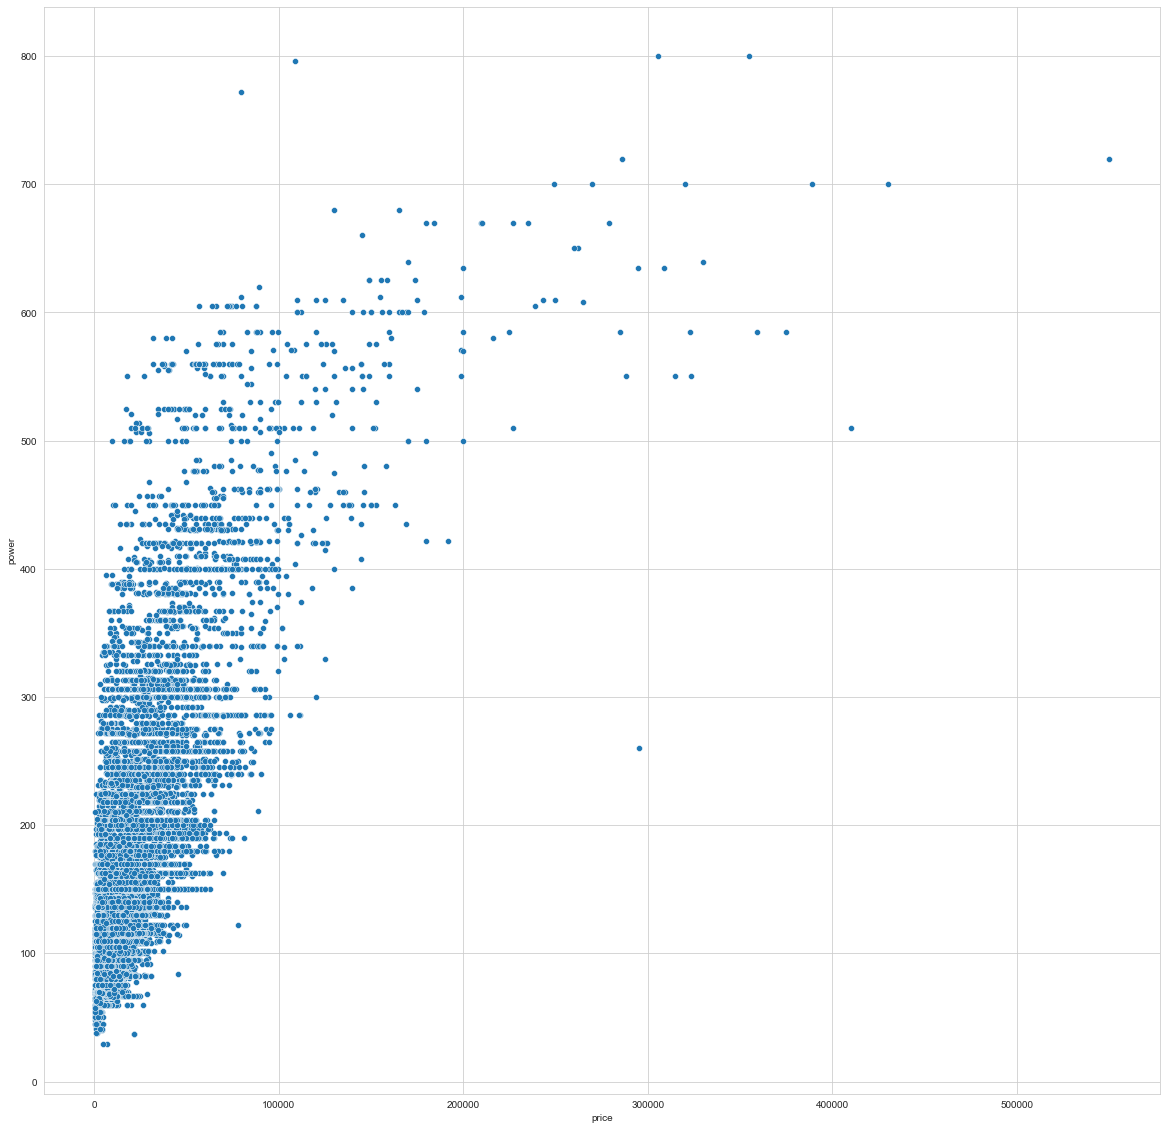

In [193]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='price', y='power');

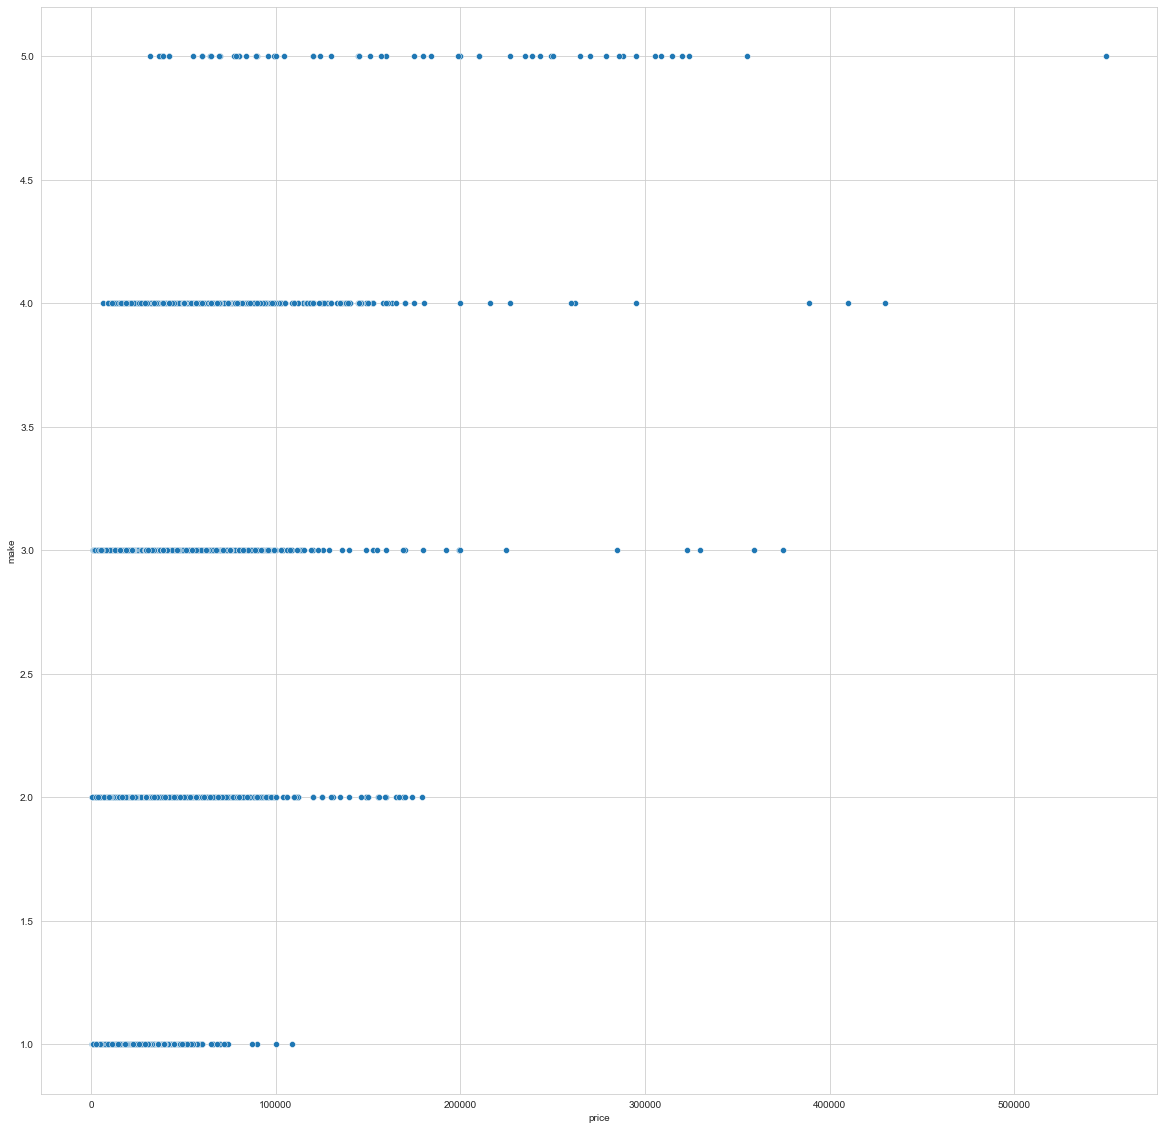

In [183]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='price', y='make');

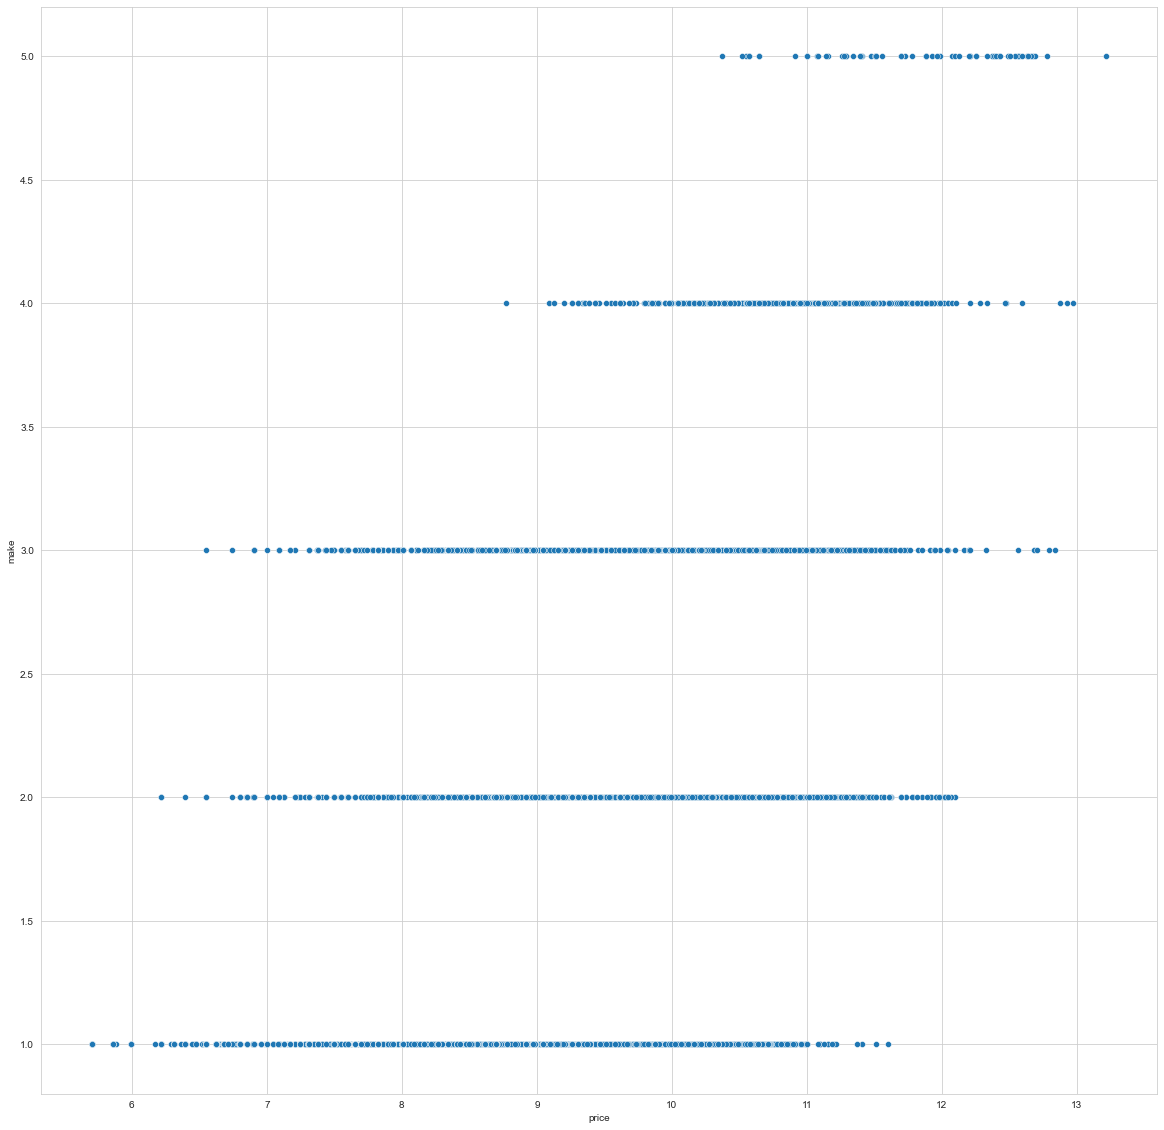

In [190]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x= np.log(df['price']), y='make');

In [ ]:
df.rename(columns={'make':'Marca',
                    'model':'Modelo',
                    'price':'Precio',
                    'fuel':'Tipo_Combustible',
                    'year':'Año',
                    'power':'CV',
                    'doors':'N_Puertas',
                    'shift':'Tipo_Cambio',
                    'photos':'N_Fotos',
                    'province':'Provincia'},inplace=True)


In [34]:
TDG = (df['Marca'] + df['Precio'] - df['kms'] + df['CV']+df['Tipo_Cambio'])/df['Precio']
df['TDG'] = TDG

In [ ]:
df.to_csv('data/coches_segunda_mano_ML.csv',index=False)

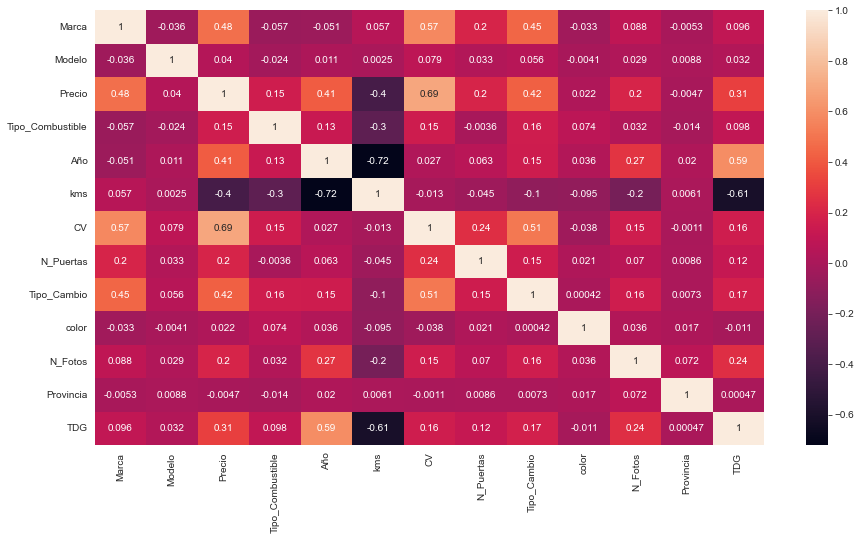

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True);